## Final Project
#### Authors: Jacklyn Tellez & Hunter Waldridge
#### Semester: Spring 2022

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.datasets import make_regression
from sklearn.datasets import make_blobs

import statsmodels.api as sm

Importing data:

In [48]:
train = pd.read_csv('avila-tr.txt')
test = pd.read_csv('avila-ts.txt')

In [49]:
test

,Intercolumnar_distance,Upper_margin,Lower_margin,Exploitation,Row_number,Modular_Ratio,Interlinear_spacing,Weight,Peak_number,Modular_ratio/Interlinear_spacing,Class
0,-3.498799,0.250492,0.232070,1.224178,-4.922215,1.145386,0.182426,-0.165983,-0.123005,1.087144,W
1,0.204355,-0.354049,0.320980,0.410166,-0.989576,-2.218127,0.220177,0.181844,2.090879,-2.009758,A
2,0.759828,-1.304042,-0.023991,-0.973663,-0.006417,-0.349509,-0.421580,-0.450127,0.469443,0.060952,I
3,-0.005490,0.360409,0.281860,-0.213479,-1.168333,-1.013906,-0.346080,1.176165,0.968347,-0.627999,E
4,0.080916,0.101320,0.104040,0.140490,0.261718,0.480988,0.710932,-0.253430,-0.497183,0.155681,A
...,...,...,...,...,...,...,...,...,...,...,...
10432,-0.128929,-0.040001,0.057807,0.557894,0.261718,-0.930856,-0.044076,1.158458,2.277968,-0.699884,X
10433,0.266074,0.556689,-0.020434,0.176624,0.261718,-0.515608,0.597681,0.178349,0.625350,-0.657245,G
10434,-0.054866,0.580242,0.032912,-0.016668,0.261718,1.519109,0.371178,-0.985508,-0.403638,1.276301,A
10435,0.080916,0.588093,0.015130,0.002250,0.261718,-0.930856,-0.270579,0.163807,-0.091823,-0.593329,F


In [50]:
train

,Intercolumnar_distance,Upper_margin,Lower_margin,Exploitation,Row_number,Modular_Ratio,Interlinear_spacing,Weight,Peak_number,Modular_ratio/Interlinear_spacing,Class
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F
...,...,...,...,...,...,...,...,...,...,...,...
10425,0.080916,0.588093,0.015130,0.002250,0.261718,-0.557133,0.371178,0.932346,0.282354,-0.580141,F
10426,0.253730,-0.338346,0.352988,-1.154243,0.172340,-0.557133,0.257927,0.348428,0.032902,-0.527134,F
10427,0.229043,-0.000745,0.171611,-0.002793,0.261718,0.688613,0.295677,-1.088486,-0.590727,0.580142,A
10428,-0.301743,0.352558,0.288973,1.638181,0.261718,0.688613,0.069175,0.502761,0.625350,0.718969,E


In [52]:
new_df = pd.concat([test,train])

In [53]:
new_df

,Intercolumnar_distance,Upper_margin,Lower_margin,Exploitation,Row_number,Modular_Ratio,Interlinear_spacing,Weight,Peak_number,Modular_ratio/Interlinear_spacing,Class
0,-3.498799,0.250492,0.232070,1.224178,-4.922215,1.145386,0.182426,-0.165983,-0.123005,1.087144,W
1,0.204355,-0.354049,0.320980,0.410166,-0.989576,-2.218127,0.220177,0.181844,2.090879,-2.009758,A
2,0.759828,-1.304042,-0.023991,-0.973663,-0.006417,-0.349509,-0.421580,-0.450127,0.469443,0.060952,I
3,-0.005490,0.360409,0.281860,-0.213479,-1.168333,-1.013906,-0.346080,1.176165,0.968347,-0.627999,E
4,0.080916,0.101320,0.104040,0.140490,0.261718,0.480988,0.710932,-0.253430,-0.497183,0.155681,A
...,...,...,...,...,...,...,...,...,...,...,...
10425,0.080916,0.588093,0.015130,0.002250,0.261718,-0.557133,0.371178,0.932346,0.282354,-0.580141,F
10426,0.253730,-0.338346,0.352988,-1.154243,0.172340,-0.557133,0.257927,0.348428,0.032902,-0.527134,F
10427,0.229043,-0.000745,0.171611,-0.002793,0.261718,0.688613,0.295677,-1.088486,-0.590727,0.580142,A
10428,-0.301743,0.352558,0.288973,1.638181,0.261718,0.688613,0.069175,0.502761,0.625350,0.718969,E


### Exploratory Analysis

Checking for missing data:

In [55]:
print(np.sum(new_df.isna()))

Intercolumnar_distance               0
Upper_margin                         0
Lower_margin                         0
Exploitation                         0
Row_number                           0
Modular_Ratio                        0
Interlinear_spacing                  0
Weight                               0
Peak_number                          0
Modular_ratio/Interlinear_spacing    0
Class                                0
dtype: int64


Data types:

In [54]:
new_df.dtypes

Intercolumnar_distance               float64
Upper_margin                         float64
Lower_margin                         float64
Exploitation                         float64
Row_number                           float64
Modular_Ratio                        float64
Interlinear_spacing                  float64
Weight                               float64
Peak_number                          float64
Modular_ratio/Interlinear_spacing    float64
Class                                 object
dtype: object

Summary statistics:

In [56]:
new_df.describe()

,Intercolumnar_distance,Upper_margin,Lower_margin,Exploitation,Row_number,Modular_Ratio,Interlinear_spacing,Weight,Peak_number,Modular_ratio/Interlinear_spacing
count,2.086700e+04,20867.000000,20867.000000,20867.000000,2.086700e+04,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000
mean,-3.306656e-09,0.018498,0.002329,0.000115,5.697992e-08,0.002540,0.003977,0.000028,0.002108,0.000069
std,1.000007e+00,2.853117,1.058203,0.999997,9.999948e-01,1.065179,1.153325,1.000003,1.045362,1.000010
min,-3.498799e+00,-2.426761,-3.210528,-5.440122,-4.922215e+00,-7.450257,-11.935457,-4.247781,-5.486218,-6.719324
25%,-1.289290e-01,-0.259834,0.064919,-0.527256,1.723400e-01,-0.598658,-0.044076,-0.543914,-0.372457,-0.515235
50%,5.622900e-02,-0.055704,0.217845,0.089437,2.617180e-01,-0.058835,0.220177,0.108279,0.064084,-0.025918
75%,2.043550e-01,0.203385,0.352988,0.643738,2.617180e-01,0.564038,0.446679,0.648814,0.500624,0.528425
max,1.181992e+01,386.000000,50.000000,3.987152,1.066121e+00,53.000000,83.000000,13.173081,44.000000,11.911338


*Data description says all attributes were normalized, but the upper_margin data has a standard deviation of 2.85*

Boxplot to visualize upper margin:

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8e62286fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8e622a3670>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8e62286d00>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8e622a3b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8e622a3e20>],
 'means': []}

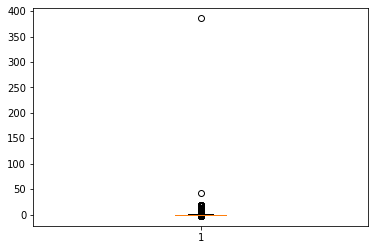

In [58]:
plt.boxplot(new_df.Upper_margin)

*Boxplot shows there is an outlier in this column, skewing the standard deviation*

In [71]:
max(new_df.Upper_margin)

386.0

In [72]:
new_df1=new_df.loc[new_df["Upper_margin"] != 386]

In [74]:
max(new_df1.Upper_margin)

43.133656

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8d4a2e5f40>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8d4a2f2520>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8d4a2e5c70>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8d4a2f2ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8d4a2f2d90>],
 'means': []}

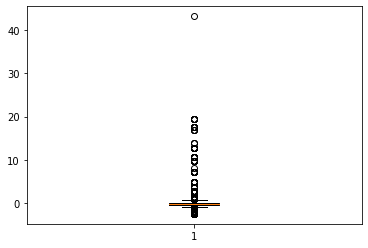

In [75]:
plt.boxplot(new_df1.Upper_margin)

13.173081

Deleted outlier makes upper margin column's std more normal

In [76]:
new_df1.describe()

,Intercolumnar_distance,Upper_margin,Lower_margin,Exploitation,Row_number,Modular_Ratio,Interlinear_spacing,Weight,Peak_number,Modular_ratio/Interlinear_spacing
count,2.086600e+04,2.086600e+04,20866.000000,20866.000000,2.086600e+04,2.086600e+04,2.086600e+04,20866.000000,2.086600e+04,20866.000000
mean,-3.306815e-09,-3.412250e-08,-0.000067,0.000107,5.698265e-08,-1.851816e-07,-4.044858e-07,0.000015,-5.705933e-07,0.000039
std,1.000031e+00,1.000027e+00,1.000017,1.000021,1.000019e+00,1.000020e+00,1.000034e+00,1.000025,1.000026e+00,1.000024
min,-3.498799e+00,-2.426761e+00,-3.210528,-5.440122,-4.922215e+00,-7.450257e+00,-1.193546e+01,-4.247781,-5.486218e+00,-6.719324
25%,-1.289290e-01,-2.598340e-01,0.064919,-0.527256,1.723400e-01,-5.986580e-01,-4.407600e-02,-0.543919,-3.724570e-01,-0.515242
50%,5.622900e-02,-5.570400e-02,0.217845,0.089437,2.617180e-01,-5.883500e-02,2.201770e-01,0.108269,6.408400e-02,-0.025936
75%,2.043550e-01,2.033850e-01,0.352988,0.643738,2.617180e-01,5.640380e-01,4.466790e-01,0.648838,5.006240e-01,0.528362
max,1.181992e+01,4.313366e+01,7.458681,3.987152,1.066121e+00,1.231557e+01,1.071479e+01,13.173081,3.244594e+00,11.911338


Histogram of dataset:

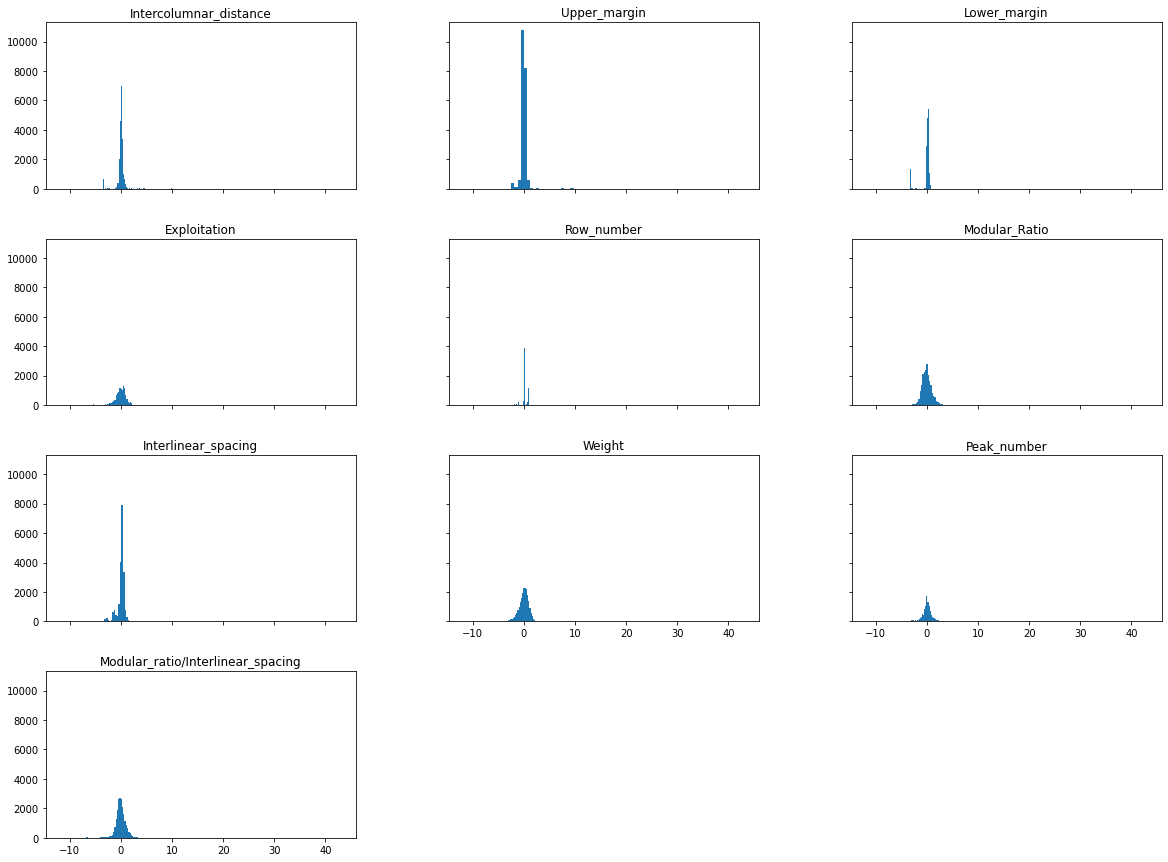

In [97]:
new_df1.hist(
    bins=75,
    figsize=(20, 15),
    grid = False,
    rwidth = 2,
    sharex = True,
    sharey = True
)
plt.show()


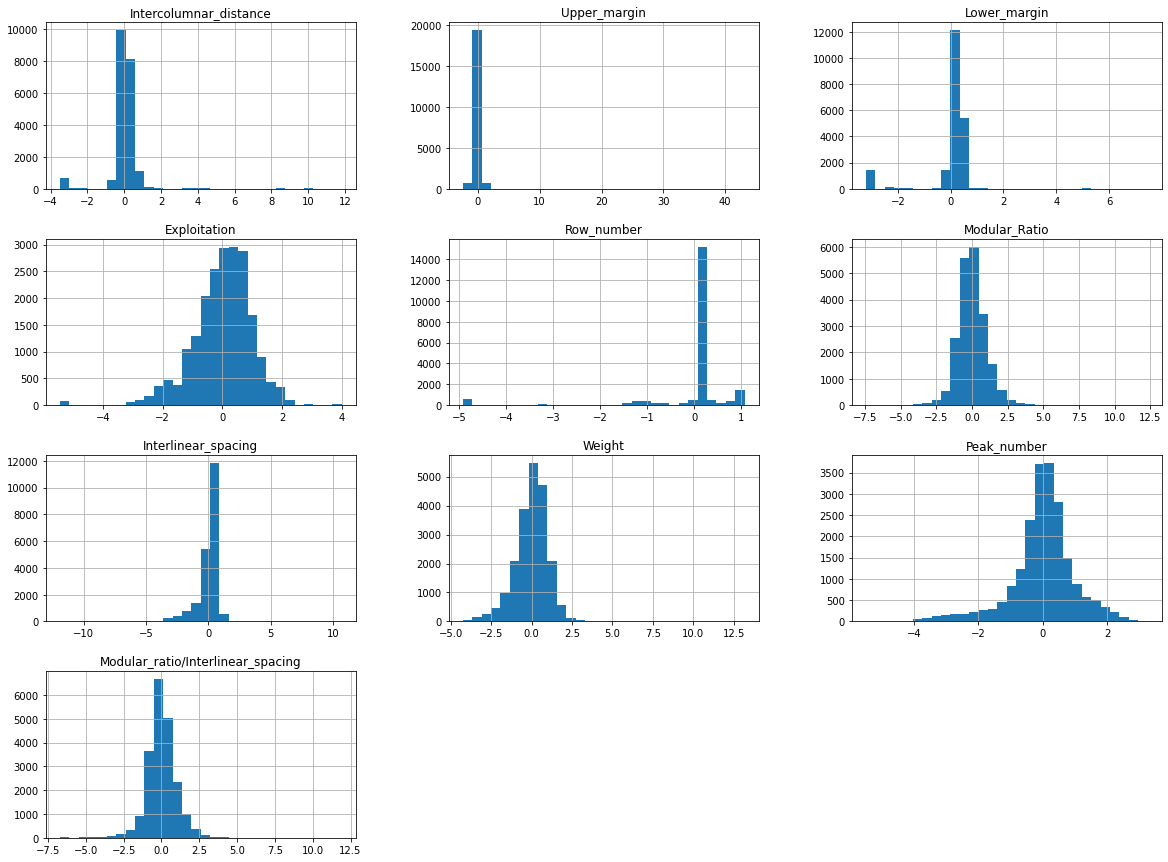

In [98]:
new_df1.hist(bins = 30, figsize=(20, 15))
plt.show()

Correlation matrix:

In [123]:
new_df1.corr()

,Intercolumnar_distance,Upper_margin,Lower_margin,Exploitation,Row_number,Modular_Ratio,Interlinear_spacing,Weight,Peak_number,Modular_ratio/Interlinear_spacing
Intercolumnar_distance,1.000000,-0.132278,0.038563,-0.057191,0.447930,-0.056887,-0.030105,-0.057518,0.085495,-0.013904
Upper_margin,-0.132278,1.000000,-0.018002,-0.001896,-0.245059,-0.079576,-0.023710,0.110565,-0.124938,-0.103062
Lower_margin,0.038563,-0.018002,1.000000,0.152158,0.012562,-0.088394,0.027517,0.034188,0.027402,-0.062259
Exploitation,-0.057191,-0.001896,0.152158,1.000000,0.096447,0.283741,0.049888,0.358601,0.307654,0.327625
Row_number,0.447930,-0.245059,0.012562,0.096447,1.000000,0.044415,0.022873,-0.065375,0.298997,0.144195
Modular_Ratio,-0.056887,-0.079576,-0.088394,0.283741,0.044415,1.000000,0.274999,-0.047357,0.053768,0.857448
Interlinear_spacing,-0.030105,-0.023710,0.027517,0.049888,0.022873,0.274999,1.000000,0.017155,0.037916,0.314547
Weight,-0.057518,0.110565,0.034188,0.358601,-0.065375,-0.047357,0.017155,1.000000,0.542691,0.001304
Peak_number,0.085495,-0.124938,0.027402,0.307654,0.298997,0.053768,0.037916,0.542691,1.000000,0.200208
Modular_ratio/Interlinear_spacing,-0.013904,-0.103062,-0.062259,0.327625,0.144195,0.857448,0.314547,0.001304,0.200208,1.000000


Heatmap of correlation matrix:

<AxesSubplot:>

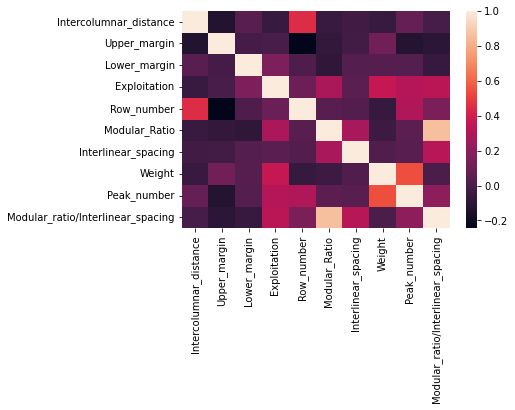

In [124]:
sns.heatmap(new_df1.corr())

Better visualization of correlation matrix:

/var/folders/43/bdr7jz1d737fv912dn77d7400000gn/T/ipykernel_16627/3378541469.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.logical_not(np.tril(np.ones_like(corr, dtype=np.bool)))


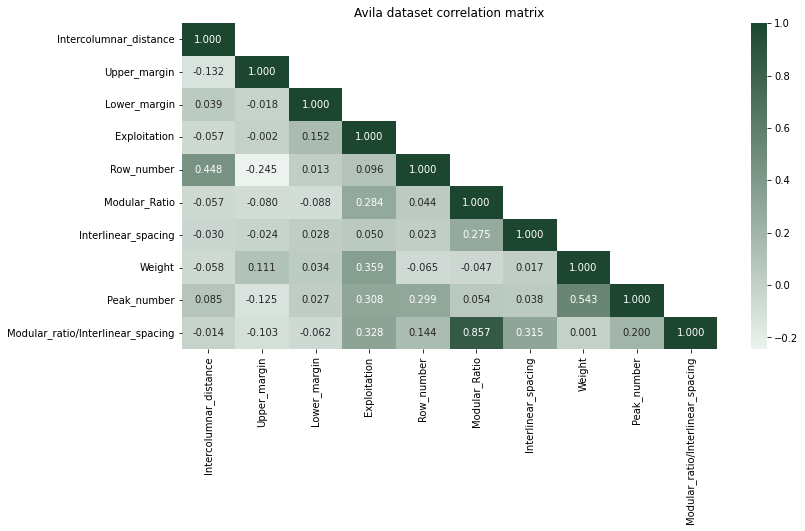

In [125]:
corr = new_df1.corr()
hm_fig, hm_ax = plt.subplots(figsize=(12,6))
mask = np.logical_not(np.tril(np.ones_like(corr, dtype=np.bool)))
sns.heatmap(
    corr,
    annot=True,
    mask=mask,
    fmt='.3f',
    ax=hm_ax,
    cmap=sns.light_palette('#1c462f', n_colors=300),
)
hm_ax.set_xticklabels(hm_ax.get_xticklabels(), rotation=90)
hm_ax.set_title('Avila dataset correlation matrix')
hm_ax.patch.set_alpha(0);

Counts of each class value:

In [126]:
new_df1['Class'].value_counts()

A    8571
F    3923
E    2190
I    1663
X    1044
H    1039
G     893
D     705
Y     533
C     206
W      89
B      10
Name: Class, dtype: int64

Averages of each attribute grouped by class:

In [128]:
class_avg=new_df1.groupby(new_df1['Class']).mean()

In [129]:
class_avg

,Intercolumnar_distance,Upper_margin,Lower_margin,Exploitation,Row_number,Modular_Ratio,Interlinear_spacing,Weight,Peak_number,Modular_ratio/Interlinear_spacing
Class,,,,,,,,,,
A,-0.017048,0.014770,-0.095196,0.017964,-0.160354,0.226872,0.131313,-0.031798,-0.311457,0.070109
B,-0.128929,12.655362,-0.162690,1.993015,-3.224030,0.822876,0.020099,0.917496,1.262492,0.871939
C,-0.500023,0.527875,0.018410,-0.874858,-0.591279,-0.492359,-0.104856,-0.449579,-0.342688,-0.503979
D,-0.239621,-0.197871,-0.167755,-0.225126,-0.001472,0.128017,0.067551,-0.057262,-0.103279,0.071765
E,-0.259317,-0.054650,0.132236,0.031211,-0.080531,-0.069466,0.196331,0.122781,0.262720,-0.137244
F,0.083733,0.030962,0.043411,-0.225101,0.054711,-0.118739,0.123355,-0.062328,-0.267787,-0.154682
G,0.039337,0.483003,0.188346,-0.201127,0.117192,-0.152099,0.300144,-0.055112,0.148608,-0.235424
H,0.215249,0.120392,0.289671,-0.446953,0.194878,-0.557999,0.192793,-0.093712,0.186049,-0.577360
I,0.649951,-0.295856,-0.089999,-0.133659,0.690980,-0.764923,-1.128631,-0.201491,0.717026,0.024624
